# Exploring Regression Analysis: Simple and Multiple Linear Regression on Multiple Datasets


1. En utilisant pandas essayer d’explorer les données des deux Data sets.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
df1 = pd.read_csv("dataSet/china_gdp.csv")
df2 = pd.read_csv("dataSet/insurance.csv")
df3 = pd.read_csv("dataSet/Salary_Data.csv")

In [100]:
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes
None


In [101]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [102]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


2. Afficher le résumer statistique des deux Data Sets avec une interprétation des résultats
obtenues.

In [103]:
print("Résumé statistique pour dataset1 : \n", df1.describe())


Résumé statistique pour dataset1 : 
              Year         Value
count    55.00000  5.500000e+01
mean   1987.00000  1.437042e+12
std      16.02082  2.500085e+12
min    1960.00000  4.668518e+10
25%    1973.50000  1.395123e+11
50%    1987.00000  3.074796e+11
75%    2000.50000  1.268748e+12
max    2014.00000  1.035483e+13


In [104]:
print("Résumé statistique pour dataset2 : \n", df2.describe())

Résumé statistique pour dataset2 : 
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


3. Afficher la nuage des points du premier data set « Expérience / Salaire » en utilisant
matplotlib et pandas.

In [105]:
df3.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


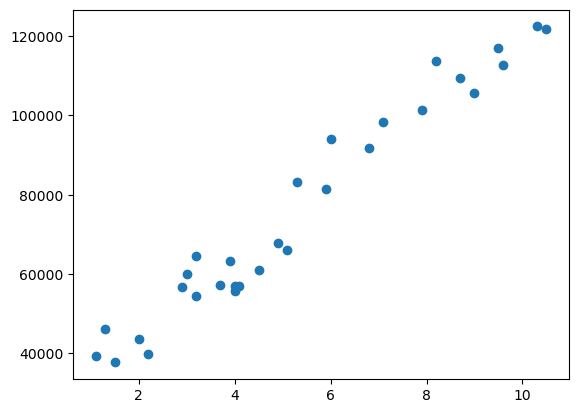

In [106]:
# Créer un scatter plot de la colonne "Expérience" par rapport à la colonne "Salaire"
plt.scatter(df3["YearsExperience"], df3["Salary"])

4. Afficher les nuages des points du deuxième data set selon les propriétés « Features » en
utilisant matplotlib et pandas « scatter_matrix ».

In [107]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>]], dtype=object)

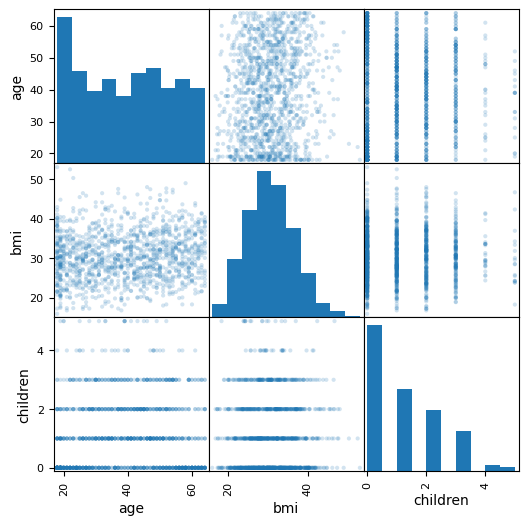

In [108]:
scatter_matrix(df2[["age", "sex", "bmi", "children","smoker","region"]], alpha=0.2, figsize=(6, 6), diagonal="hist")


1. en utilisant l’API sklearn entraîner le modèle par intermédiaire de algorithme de la régression
linière.

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [110]:
# Séparer les caractéristiques et la variable cible
X = df3[['YearsExperience']]
y = df3['Salary']

In [111]:
# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
# Créer un modèle de régression linéaire
model = LinearRegression()

In [112]:
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

LinearRegression()

2. prédire les données d’un data set de test.

In [113]:
# Prédire les valeurs de sortie pour les données de test
y_pred = model.predict(X_test)
y_test = np.array(y_test)
y_pred = pd.Series(y_pred)

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


Mean squared error: 51338023.49


In [115]:
print(y_pred)

0    75074.505110
1    91873.805638
2    62008.382477
3    81607.566426
4    67608.149319
5    89073.922217
dtype: float64


3. Visualiser le résultat de la régression sous forme d’un graphe.

In [116]:
X_test = df3[['YearsExperience']]
y_test = df3['Salary']

In [117]:
# Reshape X and y_pred arrays to have the same dimensions
model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred_reshape =model.predict(X_test.values.reshape(-1,1))


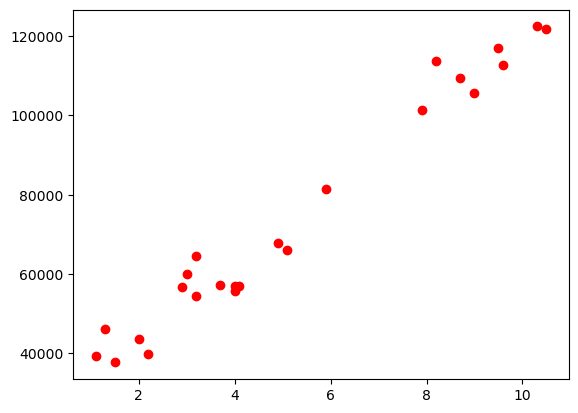

In [118]:
plt.scatter(X_train, y_train, color = 'red')

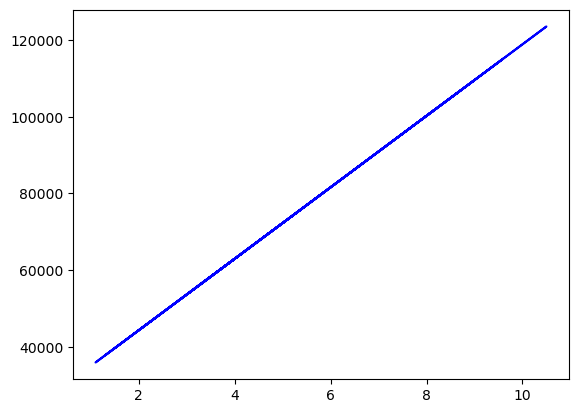

In [119]:
plt.plot(X_train, model.predict(X_train.values.reshape(-1,1)), color = 'blue')


In [137]:
# create a DataFrame with the actual and predicted values
df = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred.flatten()})

AttributeError: 'Series' object has no attribute 'flatten'

ValueError: x and y must have same first dimension, but have shapes (30, 1) and (6,)

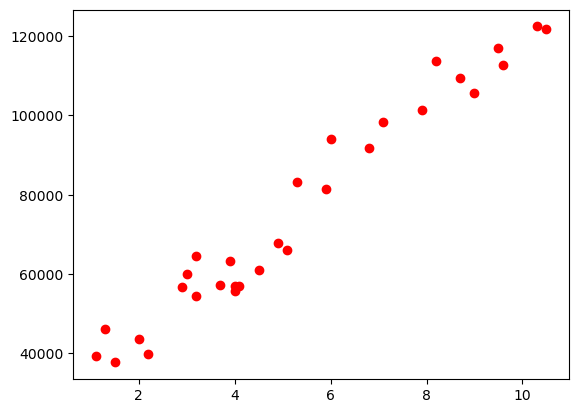

In [136]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.show()

4. Évaluer le modèle en utilisant ces trois méthodes :
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
Mean Absolute Error (MAE)
Interpréter le résultat de l’évaluation.

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE :', mean_absolute_error(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [30, 6]

1. en utilisant l’API sklearn entraîner le modèle par intermédiaire de algorithme de la régression
linière et puis la régression linière polynomiale .

In [80]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [81]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


ValueError: could not convert string to float: 'male'

2. prédire les données d’un data set de test.

In [86]:
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'male'

3. Visualiser le résultat de la régression sous forme d’un graphe.

ValueError: x and y must have same first dimension, but have shapes (268,) and (6,)

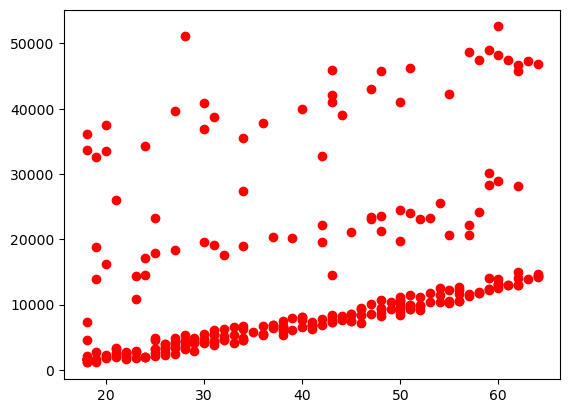

In [87]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test, color='red')
plt.plot(X_test[:, 0], y_pred, color='blue')
plt.title('Régression linéaire sur le dataset Assurance')
plt.xlabel('Âge')
plt.ylabel('Coût')
plt.show()

4. Évaluer le modèle en utilisant ces trois méthodes :
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
Mean Absolute Error (MAE)
Interpréter le résultat de l’évaluation.

In [138]:
mse = mean_squared_error(y_test.flatten(), y_pred.flatten())
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

AttributeError: 'Series' object has no attribute 'flatten'

1. en utilisant l’API sklearn entraîner le modèle par intermédiaire de algorithme de la régression
linière et puis la régression linière polynomiale .

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [139]:
# Diviser les données en X et y
X = df2.iloc[:, :-1].values
y = df2.iloc[:, 1].values

# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [142]:
#poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y_train)

NameError: name 'poly_reg' is not defined

2. prédire les données d’un data set de test pour les deux modèles .

In [143]:
# Prédire les valeurs de y pour l'ensemble de test
y_pred = regressor.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

3. Visualiser le résultat de la régression sous forme d’un graphe des deux modèles.

In [ ]:
# Visualiser les résultats de la régression polynomiale
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred_poly, color='blue')
plt.title('Régression polynomiale')
plt.xlabel('Année')
plt.ylabel('GDP')
plt.show()

4. Évaluer les deux modèles en utilisant ces trois méthodes :
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
Mean Absolute Error (MAE)
Interpréter le résultat de l’évaluation.

In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print('MSE: ', mse_poly)
print('RMSE: ', rmse_poly)
print('MAE: ', mae_poly)